<a href="https://colab.research.google.com/github/EauClaire1/MachineLearning/blob/main/%E5%88%86%E7%B1%BB%E5%AD%A6%E4%B9%A0%E7%AC%AC%E4%B8%80%E8%8A%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

class logistic_regression():
  def __init__(self):
    pass
  def sigmoid(self, x):
    z = 1 /(1 + np.exp(-x))
    return z

  def initialize_params(self, dims):
    W = np.zeros((dims, 1))
    b = 0
    return W, b

  def logistic(self, X, y, W, b):
    num_train = X.shape[0]
    num_feature = X.shape[1]
    a = self.sigmoid(np.dot(X, W) + b)
    cost = -1 / num_train * np.sum(y * np.log(a) + (1 - y) * np.log(1 - a))
    dW = np.dot(X.T, (a - y)) / num_train
    db = np.sum(a - y) / num_train
    cost = np.squeeze(cost)#[]列向量，易于plot
    return a, cost, dW, db

  def logistic_train(self, X, y, learning_rate, epochs):
    W, b = self.initialize_params(X.shape[1])
    cost_list = []
    for i in range(epochs):
      a, cost, dW, db = self.logistic(X, y, W, b)
      W = W - learning_rate * dW
      b = b - learning_rate * db
      if i % 100 == 0:
        cost_list.append(cost)
      if i % 100 == 0:
        print('epoch %d cost %f' % (i, cost))
    params = {
          'W': W,
          'b': b
          }
    grads = {
          'dW': dW,
          'db': db
          }
    return cost_list, params, grads

  def predict(self, X, params):
    y_prediction = self.sigmoid(np.dot(X, params['W']) + params['b'])
    #二分类
    for i in range(len(y_prediction)):
      if y_prediction[i] > 0.5:
        y_prediction[i] = 1
      else:
        y_prediction[i] = 0
    return y_prediction

  #精确度计算
  def accuracy(self, y_test, y_pred):
    correct_count = 0
    for i in range(len(y_test)):
      for j in range(len(y_pred)):
        if y_test[i] == y_pred[j] and i == j:
          correct_count += 1
    accuracy_score = correct_count / len(y_test)
    return accuracy_score

  #创建数据
  def create_data(self):
    X,labels = make_classification(n_samples=1000,n_features=2,n_redundant=0,n_informative=2)
    labels =labels.reshape((-1,1))
    offset =int(X.shape[0]*0.9)
    #训练集与测试集的划分
    X_train,y_train=X[:offset],labels[:offset]
    X_test,y_test=X[offset:],labels[offset:]
    return X_train,y_train,X_test,y_test

  #画图函数
  def plot_logistic(self,X_train,y_train, params):

    n = X_train.shape[0]
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    for i in range(n):
     if y_train[i] == 1:#1类
      xcord1.append(X_train[i][0])
      ycord1.append(X_train[i][1])
     else:#0类
      xcord2.append(X_train[i][0])
      ycord2.append(X_train[i][1])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1,ycord1,s=32,c='red')
    ax.scatter(xcord2,ycord2,s=32,c='green')#画点
    x=np.arange(-1.5,3,0.1)
    y=(-params['b'] - params['W'][0]* x)/ params['W'][1]#画二分类直线
    ax.plot(x,y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

(900, 2) (900, 1) (100, 2) (100, 1)
[[-2.82791085  0.41592169]
 [ 0.68880329 -1.47937439]
 [-0.95033641 -0.47070916]
 ...
 [ 0.91999099 -1.28703898]
 [-0.62466373 -0.69561237]
 [ 0.23323856  0.99654145]] [[0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 

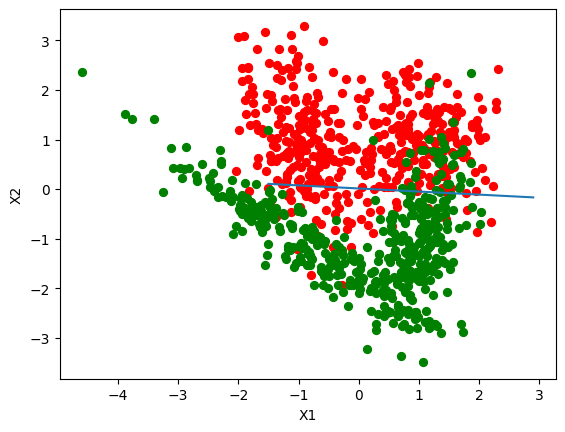

In [2]:
model = logistic_regression()
X_train, y_train, X_test, y_test = model.create_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(X_train,y_train,X_test,y_test)
# (90,2)(90,1)(10,2)(10,1)
#训练模型
cost_list, params, grads = model.logistic_train(X_train, y_train, 0.001, 3000)
print(params)
#计算精确度
y_train_pred = model.predict(X_train, params)
accuracy_score_train = model.accuracy(y_train, y_train_pred)
print('train accuracy is:', accuracy_score_train)
y_test_pred = model.predict(X_test, params)
accuracy_score_test = model.accuracy(y_test, y_test_pred)
print('test accuracy is:', accuracy_score_test)
model.plot_logistic(X_train, y_train, params)